# A/B Testing Simulation and Analysis: Boosting Email Signup Rates

## Import Libraries


In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Data Simulation



In [3]:
np.random.seed(12345)

# Randomly assign users to  control (0) or treatment (1) group.
num_users = 100000
groups = np.random.choice([0, 1], size=num_users, p=[0.5, 0.5])

control_p = 0.3

treatment_effect = 0.1


treatment_p = control_p * (1 + treatment_effect)

# Generate signup outcomes (0 for no signup, 1 for signup)
signup = np.where(groups == 0,
                  np.random.choice([0, 1], size=num_users, p=[1 - control_p, control_p]),
                  np.random.choice([0, 1], size=num_users, p=[1 - treatment_p, treatment_p]))


data = pd.DataFrame({
    'treated': groups,  
    'signup': signup     
})

print("--- Simulated Data Overview ---")
print(data.groupby(['treated'])['signup'].agg(['count', 'mean']).round(2))

--- Simulated Data Overview ---
         count  mean
treated             
0        49952  0.30
1        50048  0.33


## Evaluate Experiment Using Linear Regression



In [4]:
# linear regression 
formula = 'signup ~ treated'

model = smf.ols(formula, data).fit()

print("--- Linear Regression (OLS) Results ---")
print(model.summary())

print("\n--- Key Metrics from Linear Regression ---")
print(f"The estimated absolute impact (difference) is: {100 * model.params['treated']:.2f}%")
print(f"The estimated relative impact is: {100 * model.params['treated'] / model.params['Intercept']:.2f}%")
print(f"The t-statistic for the treatment effect is: {model.tvalues['treated']:.1f}")
print(f"The p-value for the treatment effect is: {100 * model.pvalues['treated']:.2f}%")

--- Linear Regression (OLS) Results ---
                            OLS Regression Results                            
Dep. Variable:                 signup   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     131.4
Date:                Wed, 28 May 2025   Prob (F-statistic):           2.06e-30
Time:                        19:01:30   Log-Likelihood:                -65247.
No. Observations:              100000   AIC:                         1.305e+05
Df Residuals:                   99998   BIC:                         1.305e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

## Replicate Evaluation Using a Two-Sample T-test


In [13]:
# t-test

treated_users = data[data['treated'] == 1]['signup']
control_users = data[data['treated'] == 0]['signup']


t_stat, p_value = ttest_ind(treated_users, control_users)


print("--- Two-Sample T-test Results ---")
print(f"t-statistic: {t_stat:.1f}")

print(f"p-value: {100 * p_value:.2f}%")

--- Two-Sample T-test Results ---
t-statistic: 11.5
p-value: 0.00%


## Visualization of Signup Rates


/var/folders/75/9cdckgw11b7dp5n46n9rzphm0000gn/T/ipykernel_5615/1639978344.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='treated', y='signup', data=data, ci=95, capsize=0.1)


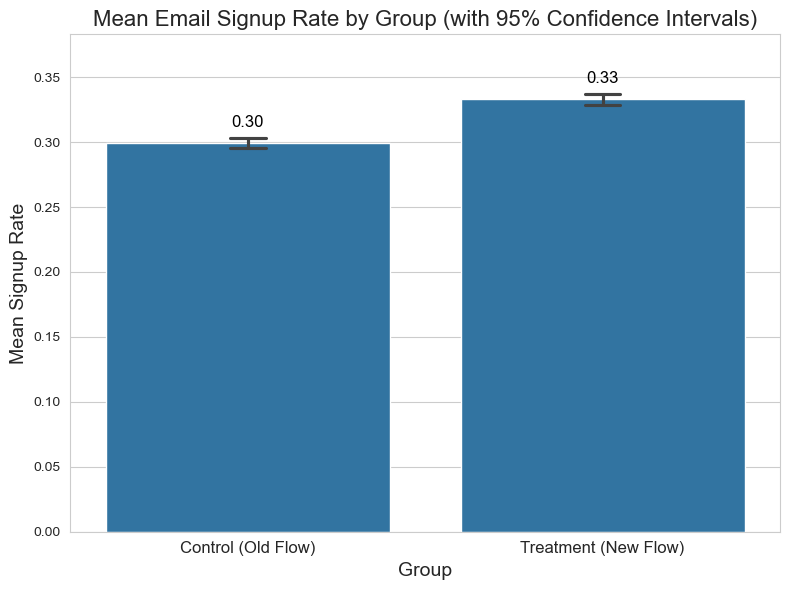

In [15]:
plt.figure(figsize=(8, 6)) 
sns.barplot(x='treated', y='signup', data=data, ci=95, capsize=0.1)

plt.xticks([0, 1], ['Control (Old Flow)', 'Treatment (New Flow)'], fontsize=12)


plt.xlabel("Group", fontsize=14)
plt.ylabel("Mean Signup Rate", fontsize=14)
plt.title("Mean Email Signup Rate by Group (with 95% Confidence Intervals)", fontsize=16)


control_mean = data[data['treated'] == 0]['signup'].mean()
treatment_mean = data[data['treated'] == 1]['signup'].mean()
plt.text(0, control_mean + 0.01, f'{control_mean:.2f}', ha='center', va='bottom', color='black', fontsize=12)
plt.text(1, treatment_mean + 0.01, f'{treatment_mean:.2f}', ha='center', va='bottom', color='black', fontsize=12)

plt.ylim(0, max(control_mean, treatment_mean) + 0.05)

plt.tight_layout()

plt.show()

## Conclusion



In [7]:
print("Conclusion")
print(f"The simulation was set up such that the control group had a {control_p*100:.0f}% signup rate, ")
print(f"and the treatment group's signup rate was designed to be {treatment_effect*100:.0f}% relatively higher than the control.")

print("\nAnalysis  showed:")
print(f"- An estimated absolute increase in signup rate of approximately {100*model.params['treated']:.2f}% for the new flow.")
print(f"- An estimated relative increase in signup rate of approximately {100*model.params['treated']/model.params['Intercept']:.2f}%.")
print("- Both the linear regression and the two-sample t-test yielded highly statistically significant results ")
print(f"  (p-values near {100*model.pvalues['treated']:.2f}%). This indicates that the observed difference is very unlikely due to random chance alone.")


Conclusion
The simulation was set up such that the control group had a 30% signup rate, 
and the treatment group's signup rate was designed to be 10% relatively higher than the control.

Analysis  showed:
- An estimated absolute increase in signup rate of approximately 3.37% for the new flow.
- An estimated relative increase in signup rate of approximately 11.26%.
- Both the linear regression and the two-sample t-test yielded highly statistically significant results 
  (p-values near 0.00%). This indicates that the observed difference is very unlikely due to random chance alone.
